# Load data

In [115]:
!wget -O Data.npz https://zenodo.org/record/4269852/files/dermamnist.npz?download=1

--2021-08-13 11:39:56--  https://zenodo.org/record/4269852/files/dermamnist.npz?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19725078 (19M) [application/octet-stream]
Saving to: ‘Data.npz’

Data.npz            100%[===================>]  18.81M  6.56MB/s    in 2.9s    

2021-08-13 11:40:00 (6.56 MB/s) - ‘Data.npz’ saved [19725078/19725078]



In [116]:
import matplotlib.pyplot as plt   
import numpy as np
from skimage import io
import matplotlib.image as mpimg
import cv2

In [117]:
d = np.load('Data.npz')
print(d.files)

['train_images', 'val_images', 'test_images', 'train_labels', 'val_labels', 'test_labels']


In [118]:
print(d['train_labels'].shape)

(7007, 1)


Train: X=(7007, 28, 28, 3), y=(7007, 1)
Test: X=(2005, 28, 28, 3), y=(2005, 1)


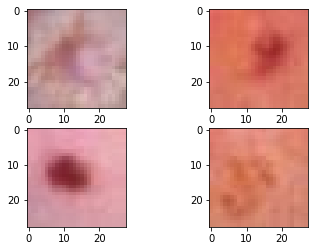

In [119]:
print('Train: X=%s, y=%s' % (d['train_images'].shape, d['train_labels'].shape))
print('Test: X=%s, y=%s' % (d['test_images'].shape, d['test_labels'].shape))
# plot some images
for i in range(4):
	plt.subplot(220 + 1 + i)
	plt.imshow(d['train_images'][i])
plt.show()

In [120]:
data = {key: d[key] for key in d.files}

In [121]:
data['train_images'][0].shape

(28, 28, 3)

# Preprocessing

In [122]:
# Display one image
def display_one(a, title1 = "Original"):
    plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.show()

# Display two images
def display(a, b, title1 = "Original", title2 = "Edited"):
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()

## Resize Images

In [128]:
# resize images
def resize_image(data):
    img = data
    print(len(img))
    print('Original size',img[0].shape)
    # setting dim of the resize
    height = 64
    width = 64
    dim = (width, height)
    res_img = []
    for i in range(len(img)):
        res = cv2.resize(img[i], dim, interpolation=cv2.INTER_LINEAR)
        res_img.append(res)

    # Checcking the size
    print("RESIZED", res_img[0].shape)
    
    # Visualizing one of the images in the array
    original = res_img[0]
    display_one(original)

    return np.array(res_img)

7007
Original size (64, 64, 3)
RESIZED (64, 64, 3)


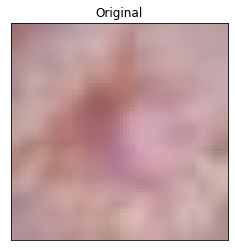

1003
Original size (64, 64, 3)
RESIZED (64, 64, 3)


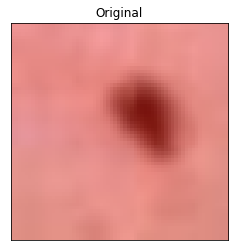

2005
Original size (64, 64, 3)
RESIZED (64, 64, 3)


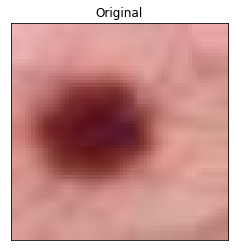

In [129]:
# Resize all images
data = {key: resize_image(data[key]) for key in d.files[:3]}

In [130]:
data['val_images'][6].shape

(64, 64, 3)

In [132]:
for tag in list(data.keys())[:3]:
  # convert from integers to floats
  data[tag] = data[tag].astype('float32')
  # normalize to range 0-1
  data[tag] /= 255

In [133]:
data['test_images'].shape

(2005, 64, 64, 3)